# Исследовательский анализ данных сервиса для оплаты поездок на самокатах

In [21]:
# Импортируем данные
import pandas as pd
df = pd.read_csv("kicksharing.csv")

In [22]:
# Выведем перавые пять строк 
df.head()

,order_rk,party_rk,gender_cd,age,education_level_cd,marital_status_cd,lvn_state_nm,minute_cost,activation_cost,hold_amount,transport_model,distance_km,created_dttm,book_start_dttm,book_end_dttm,book_time_zone_cd,local_book_start_dttm,nominal_price_rub_amt,loyalty_accrual_rub_amt,loyalty_accrual_bns_amt
0,266071307,761067705,M,40,UGR,DIV,ТЮМЕНСКАЯ ОБЛ,4.99,30.0,300.0,SL,3.690479,2024-08-07 09:47:25.000000,2024-08-07 09:47:29.325252,2024-08-07 10:07:59.339524,5,2024-08-07 11:47:29.325252,134.79,19.48,NaN
1,355113920,614049469,F,30,GRD,MAR,РОСТОВСКАЯ ОБЛ,8.49,50.0,300.0,SL,1.114912,2024-10-17 14:57:20.000000,2024-10-17 14:57:24.586000,2024-10-17 15:04:19.419607,3,2024-10-17 14:57:24.586000,109.43,40.30,NaN
2,347424551,757583701,M,28,UGR,UNM,СВЕРДЛОВСКАЯ ОБЛ,5.99,30.0,300.0,E,1.515612,2024-09-19 05:31:41.000000,2024-09-19 05:34:59.476000,2024-09-19 05:41:50.164372,5,2024-09-19 07:34:59.476000,71.93,10.79,NaN
3,351562959,541367366,M,24,GRD,UNM,Г МОСКВА,8.99,50.0,300.0,SL,0.499411,2024-10-04 16:05:09.000000,2024-10-04 16:05:13.162000,2024-10-04 16:07:31.724918,3,2024-10-04 16:05:13.162000,76.97,7.70,NaN
4,258647149,238473615,M,34,NaN,NaN,Г МОСКВА,6.99,50.0,300.0,SL,2.602028,2024-07-10 06:57:40.000000,2024-07-10 06:57:43.017125,2024-07-10 07:07:48.446462,3,2024-07-10 06:57:43.017125,126.89,25.38,NaN


## Предобработка данных

### Проверка пропусков

In [23]:
print(df.isna().sum().sort_values(ascending = False) / df.shape[0])

loyalty_accrual_bns_amt    0.944680
education_level_cd         0.520959
marital_status_cd          0.451217
lvn_state_nm               0.086143
loyalty_accrual_rub_amt    0.075002
gender_cd                  0.007362
created_dttm               0.000000
nominal_price_rub_amt      0.000000
local_book_start_dttm      0.000000
book_time_zone_cd          0.000000
book_end_dttm              0.000000
book_start_dttm            0.000000
order_rk                   0.000000
distance_km                0.000000
party_rk                   0.000000
hold_amount                0.000000
activation_cost            0.000000
minute_cost                0.000000
age                        0.000000
transport_model            0.000000
dtype: float64


**MAR (Missing At Random)**
- education_level_cd (52%) — не все пользователи указывают образование; зависит от заполненности профиля.
- marital_status_cd (45%) — часть клиентов не делится семейным статусом.
- lvn_state_nm (8%) — отсутствие региона может зависеть от канала регистрации или паттерна использования приложения.
- gender_cd (0.7%) — редкие пропуски, чаще всего вместе с другими пустыми анкетными полями.
- loyalty_accrual_rub_amt (7.5%) — пусто, если оплата не предполагала, например, поездка была сразу же отменена после начала из-за неисправности самоката или по другой причине.

**MNAR (Missing Not At Random)**
- loyalty_accrual_bns_amt (94%) — начисляется только при оплате кредитной картой, отсутствие значения отражает, что пользователь не имеет кредитки или не платит с нее при поездках на самокате.
- Соц.-демографические поля (образование, семейное положение) частично MNAR, если пропуск вызван нежеланием пользователя делиться данными.

**Итого**
- Пропуски в таких категориальных признаках как образование, семейный статус, пол, регион следует заменить на “Не указано”.
- В информации о кэшбэке следует заменить пропуски на 0.

In [24]:
df['education_level_cd'] = df['education_level_cd'].fillna('Не указано')
df['marital_status_cd'] = df['marital_status_cd'].fillna('Не указано')
df['gender_cd'] = df['gender_cd'].fillna('Не указано')
df['lvn_state_nm'] = df['lvn_state_nm'].fillna('Не указано')

df['loyalty_accrual_rub_amt'] = df['loyalty_accrual_rub_amt'].fillna(0)
df['loyalty_accrual_bns_amt'] = df['loyalty_accrual_bns_amt'].fillna(0)

### Проверка типов данных

In [25]:
# Выведем типы данных
df.dtypes

order_rk                     int64
party_rk                     int64
gender_cd                   object
age                          int64
education_level_cd          object
marital_status_cd           object
lvn_state_nm                object
minute_cost                float64
activation_cost            float64
hold_amount                float64
transport_model             object
distance_km                float64
created_dttm                object
book_start_dttm             object
book_end_dttm               object
book_time_zone_cd            int64
local_book_start_dttm       object
nominal_price_rub_amt      float64
loyalty_accrual_rub_amt    float64
loyalty_accrual_bns_amt    float64
dtype: object

1. **Числовые (int/float)**
    - `order_rk`, `party_rk`, `age` — целочисленные идентификаторы и возраст.  
    - `minute_cost`, `activation_cost`, `hold_amount`, `distance_km`, `nominal_price_rub_amt`, `loyalty_accrual_rub_amt`, `loyalty_accrual_bns_amt` — денежные показатели и метрики поездки, представлены как `float64`.
2. **Категориальные (object)**
    - `gender_cd`, `education_level_cd`, `marital_status_cd`, `lvn_state_nm`, `transport_model` — категориальные признаки, в дальнейшем стоит перевести в `category` для оптимизации.
3. **Дата и время (object)**
    - `created_dttm`, `book_start_dttm`, `book_end_dttm`, `local_book_start_dttm` — пока в формате `object`, нужно привести к `datetime`.  
    - `book_time_zone_cd` — числовой код часового пояса, сейчас `int64`.


In [26]:
# Сделаем замену типов данных
date_cols = ['created_dttm','book_start_dttm','book_end_dttm','local_book_start_dttm']
cat_cols = ['gender_cd','education_level_cd','marital_status_cd','lvn_state_nm','transport_model']

for c in date_cols:
    df[c] = pd.to_datetime(df[c], errors='coerce')

df[cat_cols] = df[cat_cols].astype('category')

In [27]:
# Првоерим замену
df.dtypes

order_rk                            int64
party_rk                            int64
gender_cd                        category
age                                 int64
education_level_cd               category
marital_status_cd                category
lvn_state_nm                     category
minute_cost                       float64
activation_cost                   float64
hold_amount                       float64
transport_model                  category
distance_km                       float64
created_dttm               datetime64[ns]
book_start_dttm            datetime64[ns]
book_end_dttm              datetime64[ns]
book_time_zone_cd                   int64
local_book_start_dttm      datetime64[ns]
nominal_price_rub_amt             float64
loyalty_accrual_rub_amt           float64
loyalty_accrual_bns_amt           float64
dtype: object

### Проверка дубликатов

In [28]:
# Проверим на явные и неявные дубликаты
print("Количество явных дубликатов:", df.duplicated().sum())
print("Дубликатов по order_rk:", df.duplicated(subset=['order_rk']).sum())

Количество явных дубликатов: 0
Дубликатов по order_rk: 0


In [29]:
# Ещё проверим на неявные дуликаты
dup_candidates = (
    df.groupby(['party_rk','book_start_dttm','book_end_dttm','distance_km','nominal_price_rub_amt'])
      .size()
      .reset_index(name='count')
      .query('count > 1')
)

print("Количество потенциальных дублей:", dup_candidates.shape[0])
display(dup_candidates.head())

Количество потенциальных дублей: 0


,party_rk,book_start_dttm,book_end_dttm,distance_km,nominal_price_rub_amt,count


- Каждая строка соответствует уникальной поездке, полных совпадений или ошибок при загрузке данных не обнаружено.  

### Проверка аномальных значений

In [32]:
# Посмотрим на аномальные значения, которые могли произойти из-за сбоя в системе, а может из-за поломок в самокатах
df['trip_duration_min'] = (df['book_end_dttm'] - df['book_start_dttm']).dt.total_seconds() / 60
df[['trip_duration_min','distance_km','nominal_price_rub_amt','age']].describe(percentiles=[0.01,0.05,0.95,0.99])

,trip_duration_min,distance_km,nominal_price_rub_amt,age
count,396749.000000,396749.000000,396749.000000,396749.000000
mean,11.440989,3.681031,127.647694,31.544006
std,13.174834,141.862349,100.122365,9.434545
min,0.033400,0.000000,0.000000,12.000000
1%,0.650279,0.000000,0.000000,18.000000
5%,1.963396,0.024576,47.970000,19.000000
50%,7.768650,1.729883,103.940000,31.000000
95%,32.072975,7.083801,284.660000,48.000000
99%,64.193356,13.723404,526.470000,60.000000
max,715.172206,56012.640308,5627.640000,94.000000


trip_duration_min           Axes(0.125,0.11;0.168478x0.77)
distance_km              Axes(0.327174,0.11;0.168478x0.77)
nominal_price_rub_amt    Axes(0.529348,0.11;0.168478x0.77)
age                      Axes(0.731522,0.11;0.168478x0.77)
dtype: object

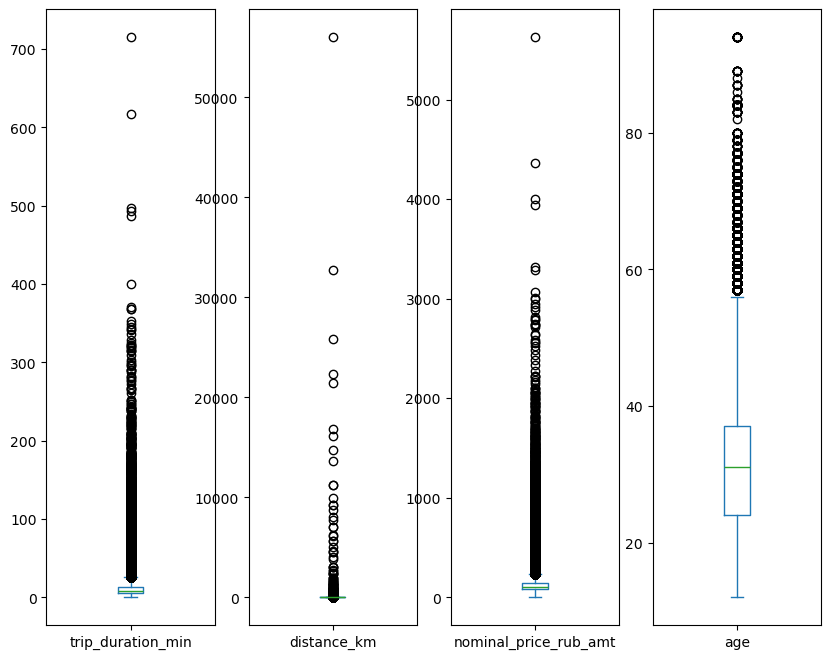

In [33]:
df[['trip_duration_min','distance_km','nominal_price_rub_amt','age']].plot(kind='box', subplots=True, figsize=(10,8))

In [34]:
num_cols = ['trip_duration_min','distance_km','nominal_price_rub_amt','age']

# Рассчитав межквартильный размах, можем выбросить выборсы
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    before = df.shape[0]
    df = df[(df[col] >= lower) & (df[col] <= upper)]
    after = df.shape[0]
    print(f"{col}: удалено {before - after} строк")

trip_duration_min: удалено 30569 строк
distance_km: удалено 17147 строк
nominal_price_rub_amt: удалено 20492 строк
age: удалено 4546 строк


- Для числовых признаков (`trip_duration_min`, `distance_km`, `nominal_price_rub_amt`, `age`) применён метод межквартильного размаха (IQR).  
- Исключены наблюдения, выходящие за границы `[Q1 - 1.5*IQR ; Q3 + 1.5*IQR]`.  
- В результате удалены аномальные значения:
  - слишком короткие или чрезмерно длинные поездки по времени;  
  - нулевые и нереалистично большие дистанции;  
  - поездки с аномально низкой или высокой стоимостью;  
  - нереалистичные значения возраста.  

---

1. **Пропуски**  
    - Категориальные признаки (`education_level_cd`, `marital_status_cd`, `gender_cd`, `lvn_state_nm`) дополнены категорией *"Не указано"*.  
    - Финансовые показатели кэшбэка (`loyalty_accrual_rub_amt`, `loyalty_accrual_bns_amt`) заполнены нулями, что отражает отсутствие начислений.  
2. **Типы данных**  
    - Датовые поля приведены к типу `datetime`.
    - Категориальные признаки переведены в формат `category` для оптимизации.
    - Числовые поля оставлены без изменений, так как типы корректные.  
3. **Дубликаты**
    - Явных дубликатов строк не обнаружено.
    - Дубликатов по ключу `order_rk` нет.
5. **Аномальные значения**
    - Для числовых признаков (`trip_duration_min`, `distance_km`, `nominal_price_rub_amt`, `age`) применён метод межквартильного размаха (IQR).  
    - Исключены записи с экстремальными значениями:
    - слишком короткие или чрезмерно длинные поездки;
    - нулевые и нереалистично большие дистанции;
    - некорректные значения стоимости;
    - аномальные значения возраста.  

#### Датасет очищен от пропусков и приведён к корректным типам. Можно переходить к исследовательскому анализу данных (EDA).

## Исследовательский анализ данных

### Временные паттерны: 

array([[<Axes: title={'center': 'trip_duration_min'}>,
        <Axes: title={'center': 'distance_km'}>]], dtype=object)

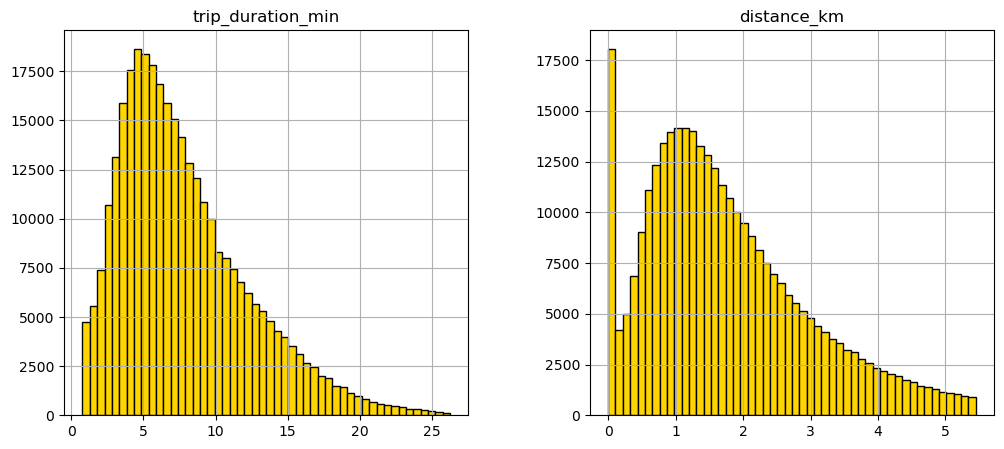

In [37]:
# Построим гистограму распределения продолжительности и протяжённости поездок
df[['trip_duration_min','distance_km']].hist(bins=50, figsize=(12,5), color="#FFD500", edgecolor="black")

In [40]:
df[['trip_duration_min','distance_km']].describe(percentiles=[0.01,0.05,0.5,0.95,0.99])

,trip_duration_min,distance_km
count,323995.000000,323995.000000
mean,7.825628,1.757716
std,4.475116,1.192509
min,0.764181,0.000000
1%,1.133709,0.000000
5%,2.206945,0.068176
50%,6.867767,1.523132
95%,16.601911,4.162278
99%,21.359240,5.085672
max,26.279885,5.448101


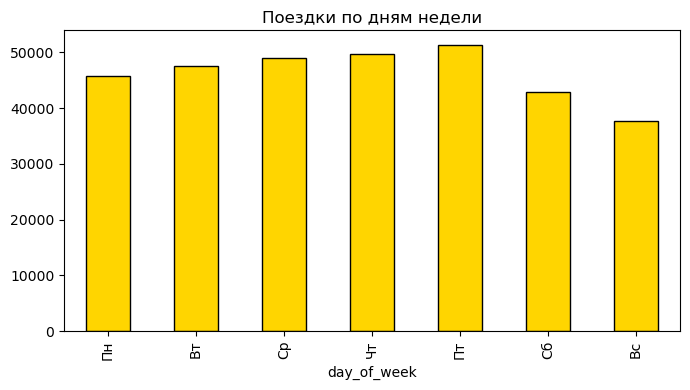

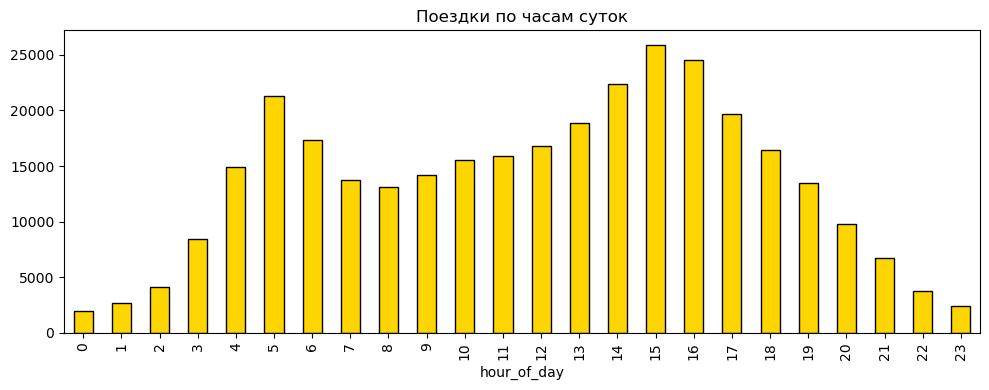

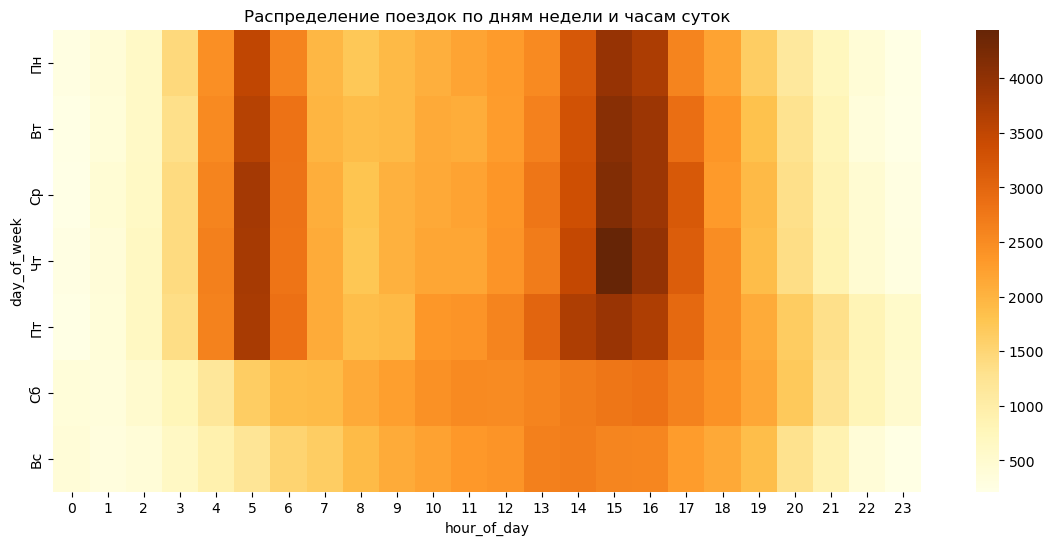

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

df['day_of_week'] = df['book_start_dttm'].dt.dayofweek.map({0:'Пн',1:'Вт',2:'Ср',3:'Чт',4:'Пт',5:'Сб',6:'Вс'})
df['hour_of_day'] = df['book_start_dttm'].dt.hour

# По дням недели
dow_counts = df['day_of_week'].value_counts().reindex(['Пн','Вт','Ср','Чт','Пт','Сб','Вс'])
ax = dow_counts.plot(kind='bar', figsize=(7,4), color="#FFD500", edgecolor="black")
ax.set_title("Поездки по дням недели")
plt.tight_layout()
plt.show()

# По часам суток
hr_counts = df['hour_of_day'].value_counts().sort_index()
ax = hr_counts.plot(kind='bar', figsize=(10,4), color="#FFD500", edgecolor="black")
ax.set_title("Поездки по часам суток")
plt.tight_layout()
plt.show()

# Тепловая карта день × час
pivot = df.groupby(['day_of_week','hour_of_day']).size().unstack(fill_value=0).reindex(['Пн','Вт','Ср','Чт','Пт','Сб','Вс'])
plt.figure(figsize=(14,6))
sns.heatmap(pivot, cmap="YlOrBr")
plt.title("Распределение поездок по дням недели и часам суток")
plt.show()

### Модели самокатов

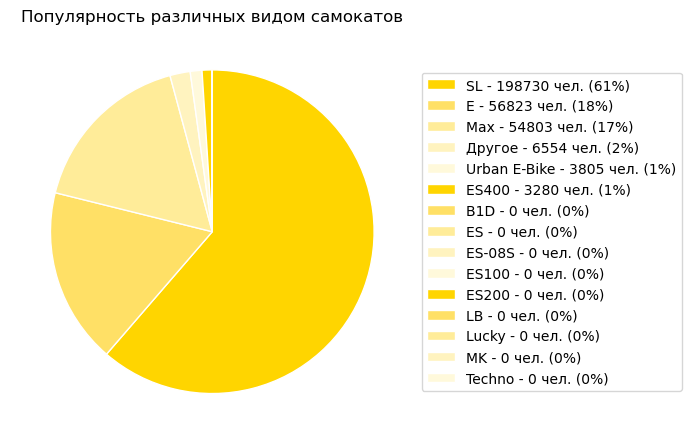

In [54]:
plt.figure(figsize=(7,7))
plt.pie(
    counts.values,
    labels=None,   # отключаем подписи
    startangle=90,
    counterclock=False,
    colors=["#FFD500", "#FFE066", "#FFEC99", "#FFF3BF", "#FFF9DB"],
    wedgeprops=dict(edgecolor="white", linewidth=1)
)

labels = [f"{label} - {val} чел. ({val/ counts.sum():.0%})"
          for label, val in zip(counts.index, counts.values)]

plt.legend(labels, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("Популярность различных видом самокатов")
plt.tight_layout()
plt.show()

### 

## Профиль клиентов

### Образование пользователей

In [ ]:
# Подсчёт количества пользователей с каждым типом образования
df['education_level_cd'].value_counts()

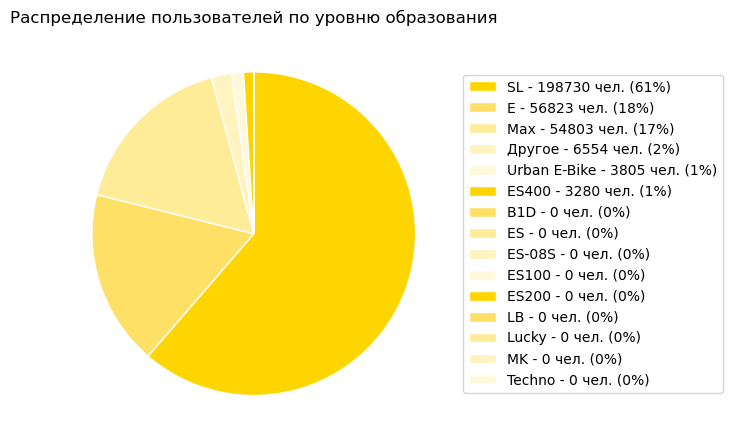

In [52]:
plt.figure(figsize=(7,7))
plt.pie(
    counts.values,
    labels=None,   # отключаем подписи
    startangle=90,
    counterclock=False,
    colors=["#FFD500", "#FFE066", "#FFEC99", "#FFF3BF", "#FFF9DB"],
    wedgeprops=dict(edgecolor="white", linewidth=1)
)

labels = [f"{label} - {val} чел. ({val/ counts.sum():.0%})"
          for label, val in zip(counts.index, counts.values)]

plt.legend(labels, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("Распределение пользователей по уровню образования")
plt.tight_layout()
plt.show()


- Половина пользоватлей самоката это люди с высшем образованием